1038.hea
1038
1038.hea
dat/1038


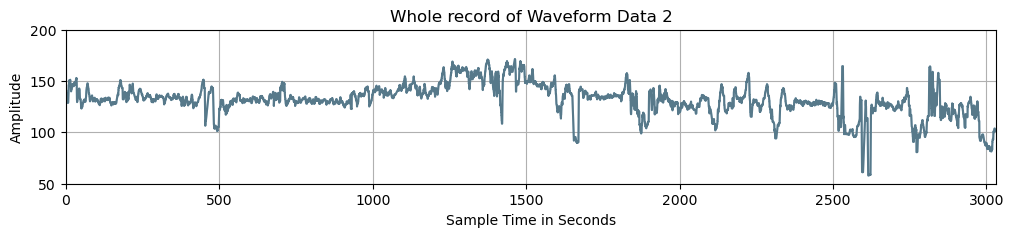

[140.75 139.75 139.75 ... 102.   101.75 101.75]
12124
1004.hea
1004
1004.hea
dat/1004


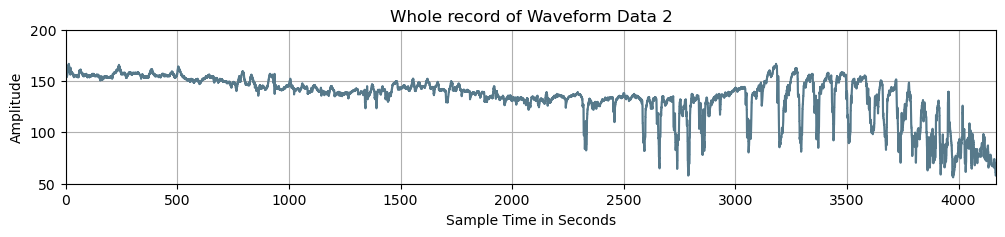

[153.75 153.75 153.75 ...  58.    58.    58.  ]
16671
1010.hea
1010
1010.hea
dat/1010


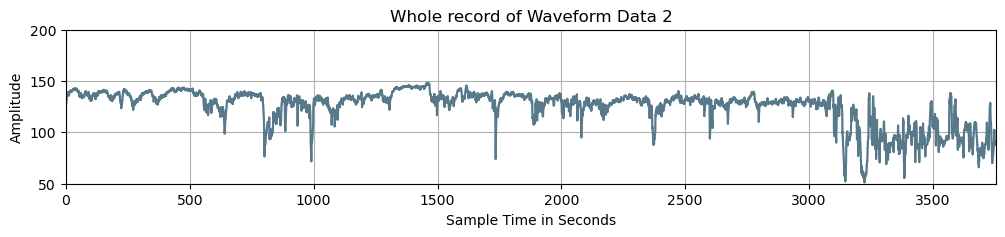

[126.   127.   127.   ...  88.25  88.25  88.25]
15017
2041.hea
2041
2041.hea
dat/2041


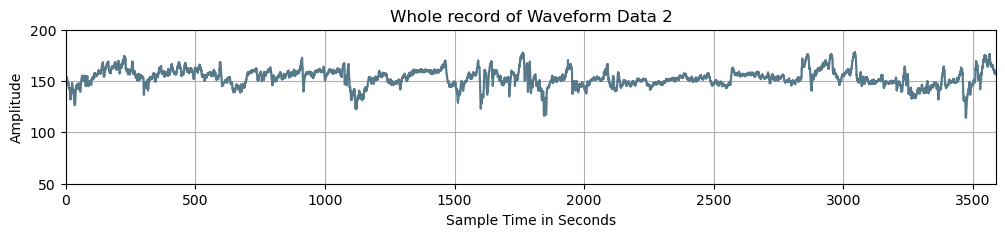

[151.5  151.5  150.25 ... 156.75 157.   156.75]
14358
1206.hea
1206
1206.hea
dat/1206


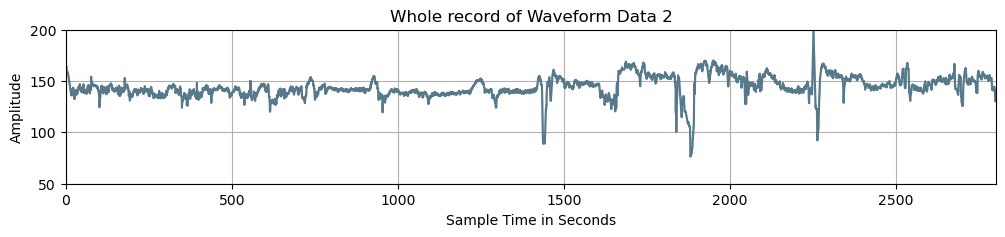

[157.  157.  157.  ... 130.5 130.5 130.5]
11207
1212.hea
1212
1212.hea
dat/1212


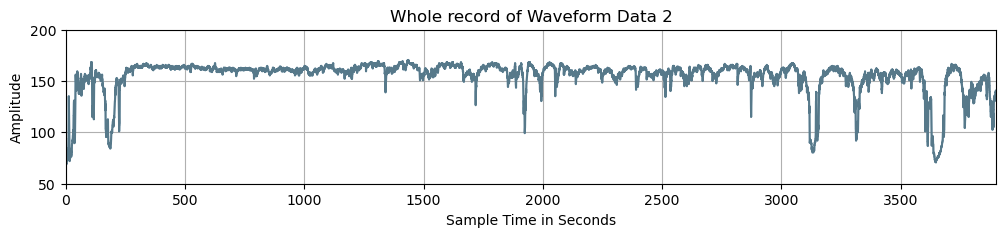

[ 73.5   69.5   69.5  ... 138.25 140.75 140.25]
15600
1399.hea
1399
1399.hea
dat/1399


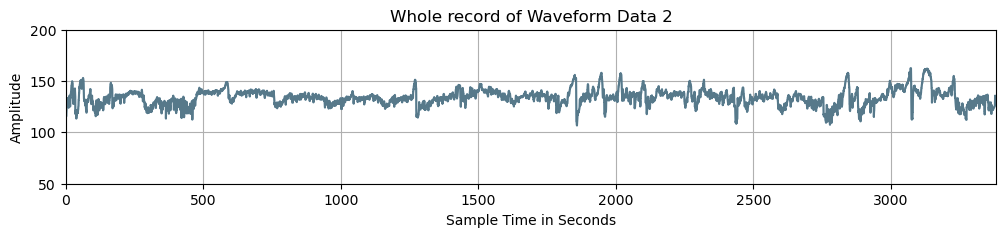

[120.75 116.   116.   ... 133.   133.   133.  ]
13529
1428.hea
1428
1428.hea
dat/1428


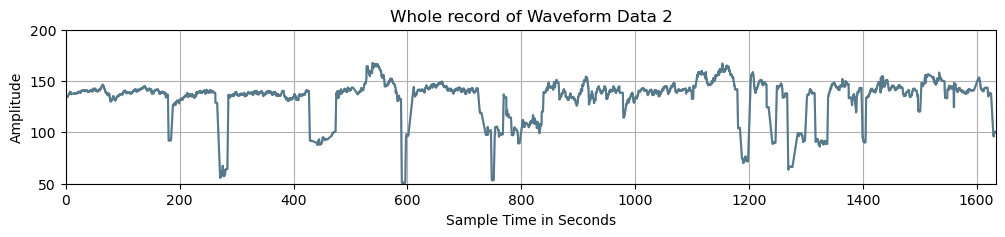

[135.75 135.75 133.75 ... 100.5  100.5  100.25]
6537
1414.hea
1414
1414.hea
dat/1414


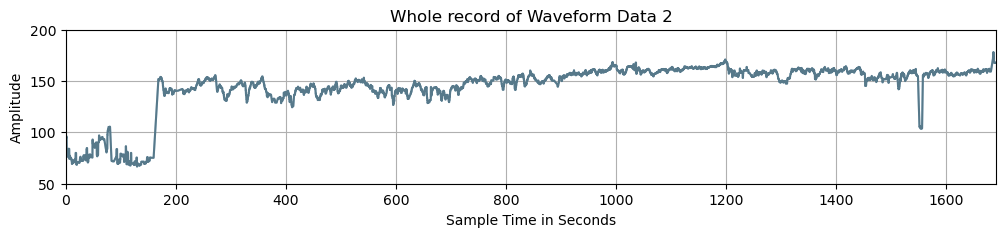

[ 94.25  94.25  94.25 ... 167.75 167.75 167.75]
6766
1372.hea
1372
1372.hea
dat/1372


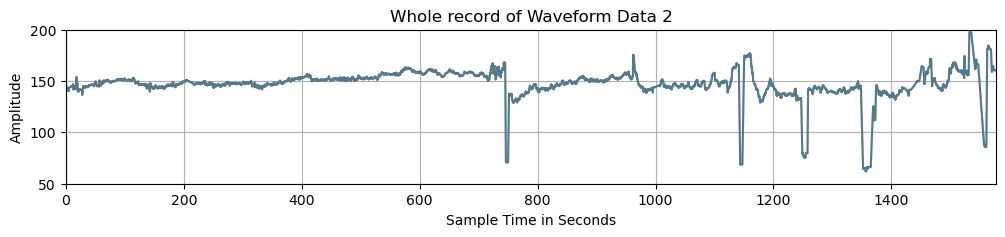

[144.5  144.5  145.75 ... 160.5  160.5  160.5 ]
6310
1366.hea
1366
1366.hea
dat/1366


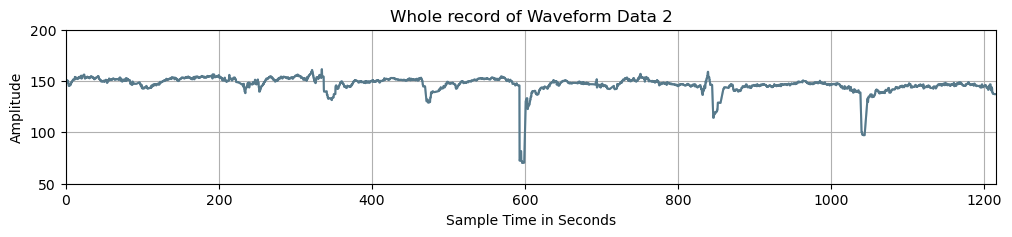

[150.75 150.75 150.5  ... 137.25 137.25 137.25]
4861
1400.hea
1400
1400.hea
dat/1400


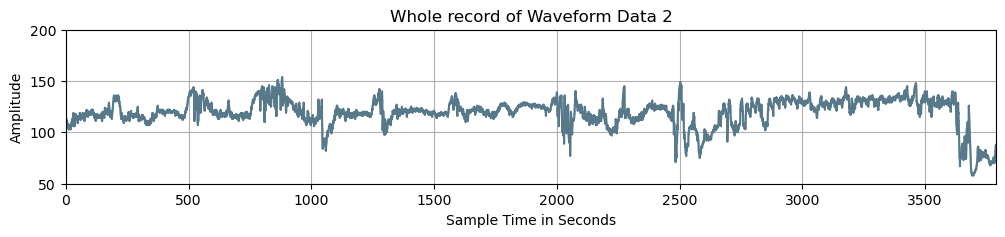

[116. 116. 114. ...  88.  88.  88.]
15157
1158.hea
1158
1158.hea
dat/1158


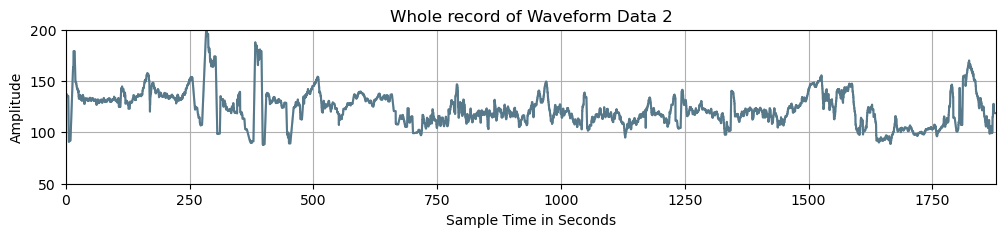

[136.5  136.5  136.25 ... 118.75 118.75 118.75]
7514
1170.hea
1170
1170.hea
dat/1170


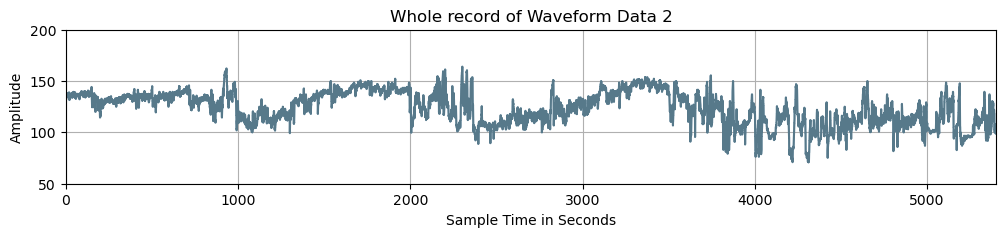

[133.25 133.25 132.75 ...  98.75  98.75  99.25]
21600
1164.hea
1164
1164.hea
dat/1164


IndexError: index 0 is out of bounds for axis 0 with size 0

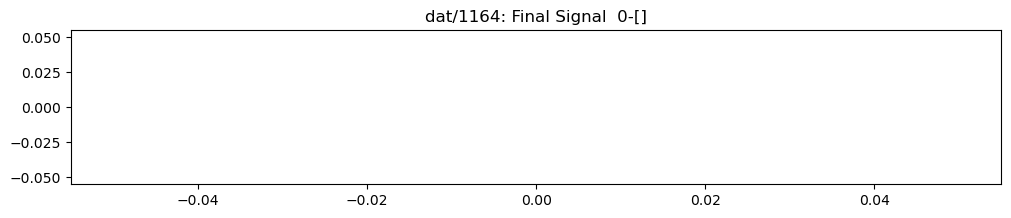

In [41]:
import numpy as np;
import pandas as pd;
import os;
import matplotlib.pyplot as plt;
!pip install wfdb;
import wfdb;

import simple_denoise;
from simple_denoise import get_valid_segments;

def get_recno(dir):
    for f in os.listdir(dir) :
        if os.path.isfile(os.path.join(dir, f)) and f.endswith('.hea'):
            print(f)
            yield f.split('.')[0]

DIR = 'dat/'
recnos = get_recno(DIR)

for value in get_recno(DIR):
    print(value)
    
    FILEPATH = 'dat/' + str(next(recnos))

    print(FILEPATH)

    signals, fields = wfdb.rdsamp(FILEPATH)

    # transpose the matrix as originally it was vertical
    signals = np.transpose(signals)

    #print(signals[0])

    fetal_hr = signals[0]

    # the total seconds of the file is the length of the file divided by 4 as it was sampled at 4Hz
    ts = np.arange(len(fetal_hr))/4.0

    #get the valid segments (ie the processed segments without the long gaps)
    selected_segments = get_valid_segments(fetal_hr, ts, FILEPATH, verbose=False,
                                               #max_change=15, verbose_details=True
                                              )
    len_s = len(selected_segments)
    new_signal = []

    #add the segments together for the new processed signal
    for i in range(len_s):
        new_signal.extend(selected_segments[i]['seg_hr'])

    new_time = np.arange(len(new_signal))/4.0

    plt.figure(figsize=(12, 2))
    plt.title('{}: Final Signal  {}-{}'.format(FILEPATH, 0, new_time))
    plt.plot(new_time, new_signal)
    plt.plot(new_time, new_signal, alpha=0.25)
    plt.xlim(new_time[0], new_time[-1])
    plt.ylim(50, 200)
    plt.xlabel('Sample Time in Seconds')
    plt.ylabel('Amplitude')
    plt.title('Whole record of Waveform Data 2')
    plt.grid(True)
    plt.show()

    #function to write the data
    def write_array_to_dat_file(data_array, file_path):
        with open(file_path, 'w') as file:
            for number in data_array:
                file.write(str(number) + '\n')
                
    #write the data to the new directory
    data = new_signal  
    file_path = 'processed_'+FILEPATH+'.dat'
    write_array_to_dat_file(data, file_path)

    # try_new_signal = np.loadtxt(file_path)
    # print(try_new_signal)
    # print(len(try_new_signal))